<a id="top"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#253458;overflow:hidden">Plano de Saúde</div>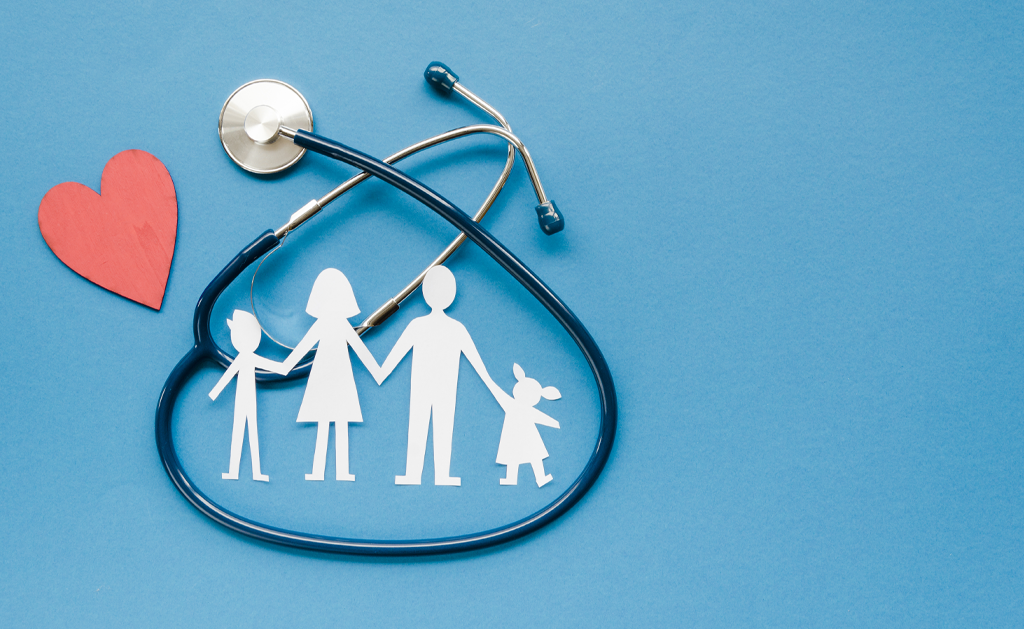

<a id="1"></a>
## <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">1° | Problema de Negócio</div>

## <a> Motivação </a>

O cientista de dados é contratado para resolver problemas!!! E um dos problemas mais comuns no mundo real são as regressões. Um problema pode ser modelado como sendo uma regressão quando queremos prever um número real, ou, mais tecnicamente: quando queremos prever uma variável contínua.

A ideia desse projeto é iniciar no mundo de machine learning, com separação de bases, avaliação de métricas, uso de cross validation e, finalmente, criação e comparação de modelos preditivos utilizando a biblioteca scikit learn.

## <a> Objeto de Estudo </a>

A área médica e de seguradoras de saúde utiliza muito as técnicas de ciência de dados e machine learning para avaliar risco dos seus segurados/pacientes. 

O problema que queremos solucionar e prever os gastos com planos de saúde de acordo com as características do segurado. Poderia ser um problema interessante tanto para os segurados *(para saber quais características tornam seu plano mais caro ou barato)*, quanto para seguradoras *(para que mantenha suas contas equilibradas e saiba os segurados que devem ter um preço mais alto/baixo)

- *Seu trabalho como Data Scientist é desenvolver um modelo para realizar a previsão do valor do plano de Saúde para seus beneficiários*.


Bora de mão na massa?

<a id="2"></a>
## <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">2° | Análise Exploratória dos Dados</div>

<a id="2.1"></a>
<h4 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>2.1 | Importando as</b> Bibliotecas

In [1]:
# Importando as bibliotecas para leitura dos dados e criação de gráficos
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


# Configurando pandas para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 

# Configurando pandas para não mostrar notação científica para números
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Ignorando Alertas
import warnings
warnings.filterwarnings("ignore")

<a id="2.2"></a>
<h4 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>2.2 | Carregando os</b> Dados

> <span style='font-size:15px; font-family:Verdana;color: #254E58; border-bottom: solid 3px'><b>2.2.1 | Visualizando a base de Dados</b></span>

In [2]:
# Ler os dados do seguro
df_seguro = pd.read_csv('insurance.csv')
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


> <span style='font-size:15px; font-family:Verdana;color: #254E58; border-bottom: solid 3px'><b>2.2.2 | Visualizando a base de dados em um Display</b></span>

In [3]:
styled_df = df_seguro.head().style

# Defina a cor de fundo, a cor do texto e a borda de todo o DataFrame
styled_df.set_properties(**{"background-color": "#254E58", "color": "#e9c46a", "border": "1.5px solid black"})

# Modificando a cor de fundo dos cabeçalhos da tabela
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900000,0,yes,southwest,16884.924000
1,18,male,33.770000,1,no,southeast,1725.552300
2,28,male,33.000000,3,no,southeast,4449.462000
3,33,male,22.705000,0,no,northwest,21984.470610
4,32,male,28.880000,0,no,northwest,3866.855200


<a id="2.3"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>2.3 | Algumas </b> Informações dos Dados!

> <span style='font-size:15px; font-family:Verdana;color: #254E58; border-bottom: solid 3px'><b>2.3.1 | 
Números de Linhas e Colunas</b></span>

In [4]:
# Avaliando a quantidade de linhas e colunas
df_seguro.shape

(1338, 7)

> <span style='font-size:15px; font-family:Verdana;color: #254E58; border-bottom: solid 3px'><b>2.3.2 | Tipo de dados</b></span>

In [5]:
# Avaliando os tipos
df_seguro.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
# Avaliando os tipos
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


> <span style='font-size:15px; font-family:Verdana;color: #254E58; border-bottom: solid 3px'><b>2.3.3 | Verificando Valores Ausentes/Nulos</b></span>

In [7]:
# isnull busca quem é nulo (dados faltantes)
df_seguro.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

> <span style='font-size:15px; font-family:Verdana;color: #254E58; border-bottom: solid 3px'><b>2.3.4 | Verificando Valores Duplicados</b></span>

In [8]:
df_seguro.duplicated().sum()

1

<a id="2.4"></a>
<h4 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>2.4 | Estatística Descritiva </b> → Análise Matemática 

- Conhecer bem as medidas estatísticas, de tendência central, dispersão, separatrizes, distribuições, é essencial para conhecermos melhor os dados em que estamos trabalhando. 

  - Qual a distribuição da idade? 
  - Índice de massa corporal? 
  - E a variável target?

In [9]:
df_seguro.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


<a id="2.5"></a>
<h4 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>2.5 | Visualização </b>de Dados

> <span style='font-size:15px; font-family:Verdana;color: #254E58; border-bottom: solid 3px'><b>2.5.1 | Analisando as distribuições das idades</b></span>

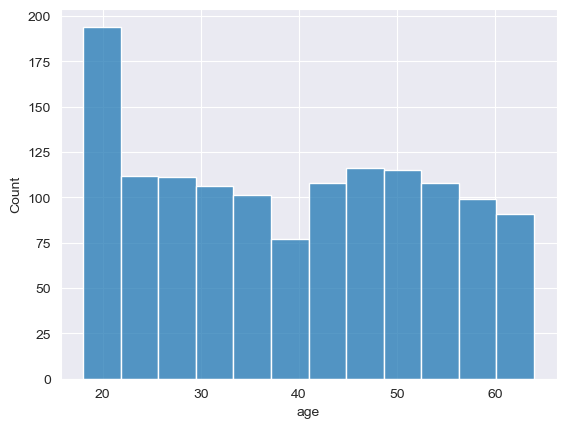

In [10]:
# Analisando as distribuições das idades
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_seguro, x='age' );

> <span style='font-size:15px; font-family:Verdana;color: #254E58; border-bottom: solid 3px'><b>2.5.2 | Analisando as distribuições do índice de massa corporal</b></span>

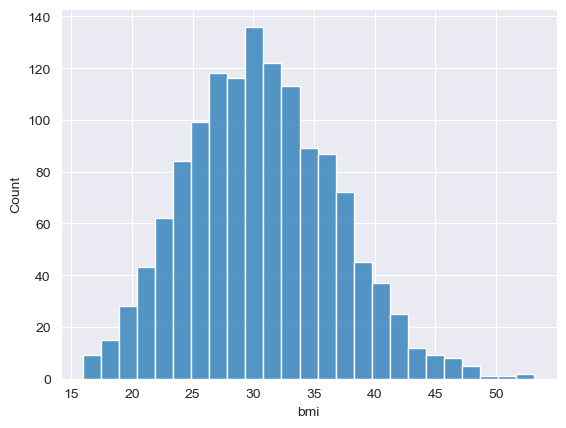

In [11]:
# Analisando as distribuições do índice de massa corporal
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_seguro, x='bmi');

> <span style='font-size:15px; font-family:Verdana;color: #254E58; border-bottom: solid 3px'><b>2.5.3 | Analisando as quantidades de crianças</b></span>

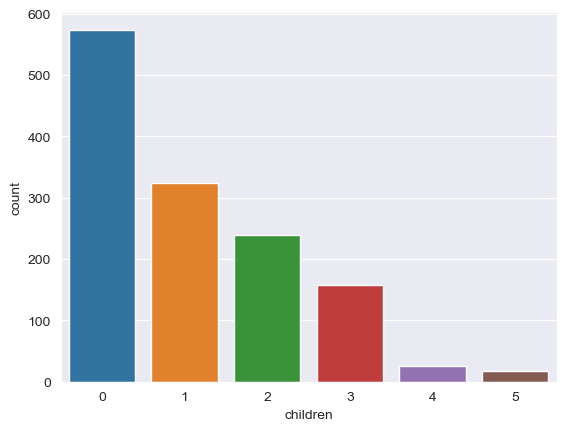

In [12]:
# Analisando as quantidades de crianças
sns.set_style("darkgrid")
plt.tight_layout()

sns.countplot(data=df_seguro, x='children');


> <span style='font-size:15px; font-family:Verdana;color: #254E58; border-bottom: solid 3px'><b>2.5.4 | Analisando a variável target: valor do seguro</b></span>

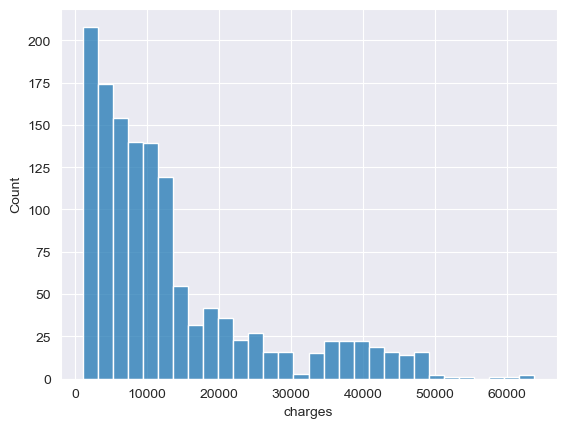

In [13]:
# Analisando a variável target: valor do seguro
sns.histplot(data=df_seguro['charges']);

> <span style='font-size:15px; font-family:Verdana;color: #254E58; border-bottom: solid 3px'><b>2.5.5 | 
Relação entre as features e a variável target </b></span>

- Uma análise interessante é avaliar relações entre as variáveis preditoras com a target. Vamos analisar as dispersões das variáveis preditoras com o valor do seguro.

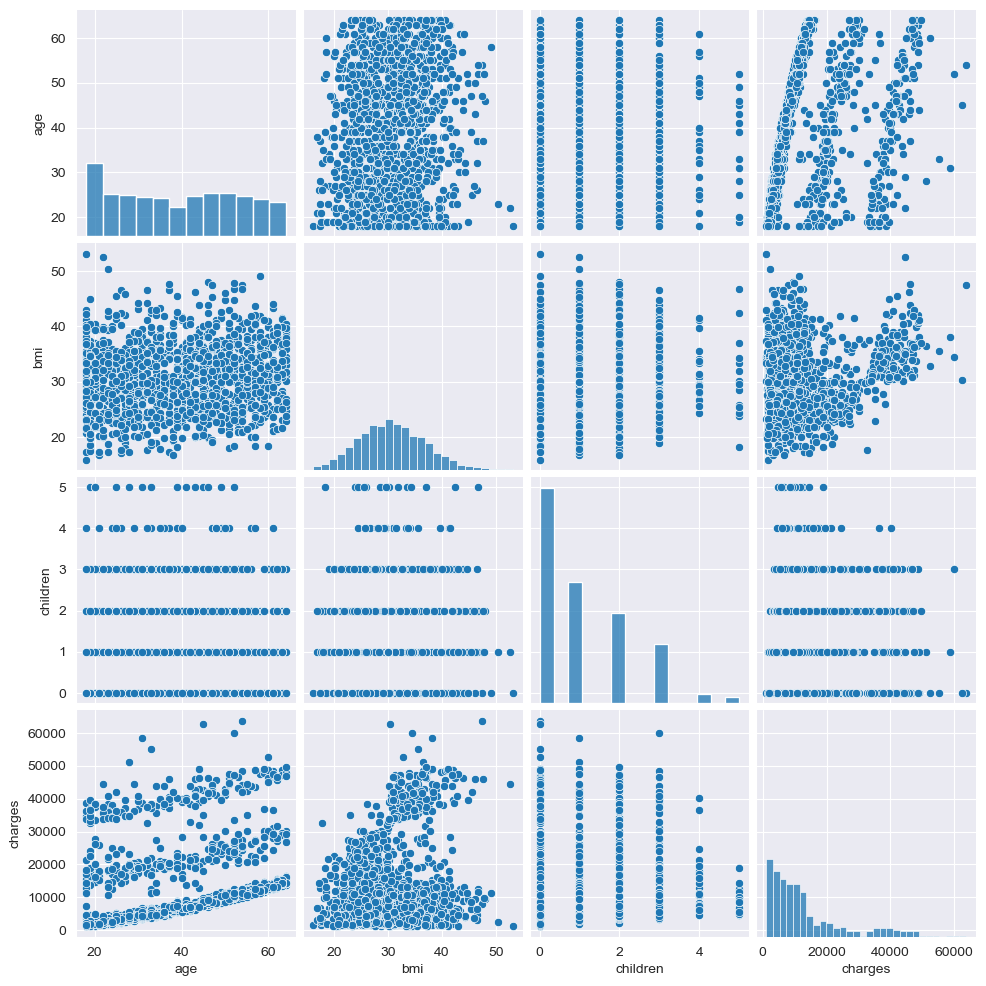

In [14]:
# O pairplot faz gráficos de dispersão para os pares de variáveis (incluindo a target)
# Na diagonal principal ele mostra o histograma
sns.pairplot(data=df_seguro);

**Conclusão**: Fica evidente uma correlação positiva entre idade e as cobranças de planos de saúde (age x charges). Provavelmente será uma variável de importância no modelo preditivo

> <span style='font-size:15px; font-family:Verdana;color: #254E58; border-bottom: solid 3px'><b>2.6.1 | 
Visualizando as variáveis Categóricas</b></span>

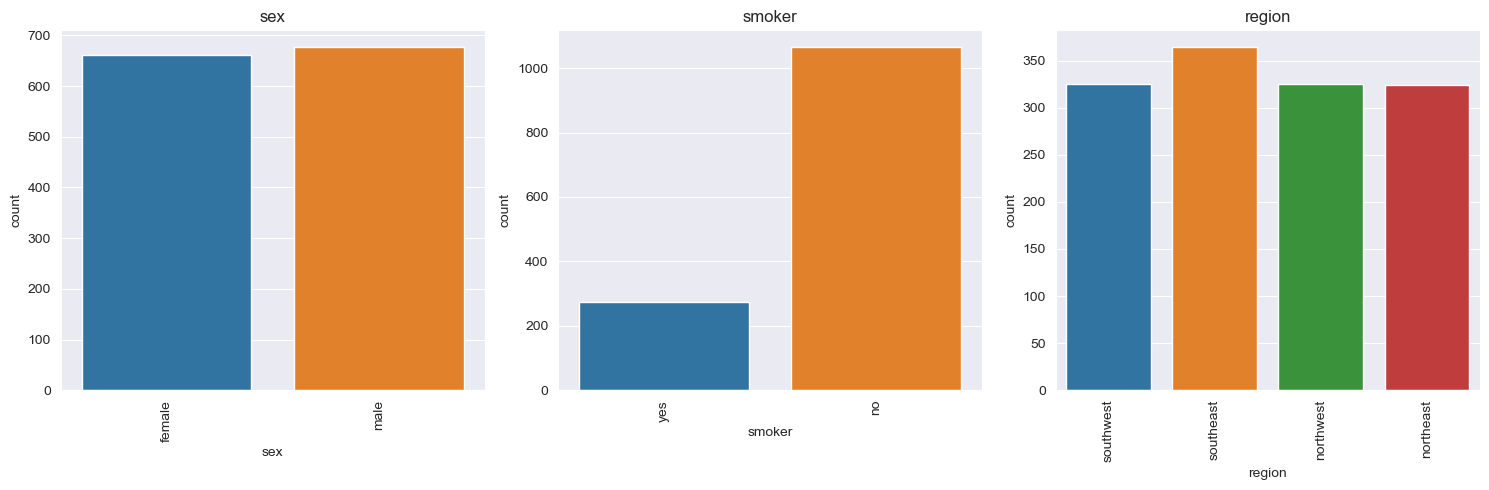

In [15]:
def plot_categorical_variables(df):
    # Variáveis Categóricas
    cat_vars = [var for var in df.select_dtypes(include='object')] 

    num_cols = len(cat_vars)
    num_rows = (num_cols + 2) // 3
    fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
    axs = axs.flatten()

    for i, var in enumerate(cat_vars):
        top_values = df[var].value_counts().nlargest(6).index
        filtered_df = df[df[var].isin(top_values)]
        sns.countplot(x=var, data=filtered_df, ax=axs[i])
        axs[i].set_title(var)
        axs[i].tick_params(axis='x', rotation=90)

    if num_cols < len(axs):
        for i in range(num_cols, len(axs)):
            fig.delaxes(axs[i])

    fig.tight_layout()

    plt.show();

# Chamada da função
plot_categorical_variables(df_seguro)

> <span style='font-size:15px; font-family:Verdana;color: #254E58; border-bottom: solid 3px'><b>2.6.1 | 
Visualizando as variáveis Numéricas</b></span>

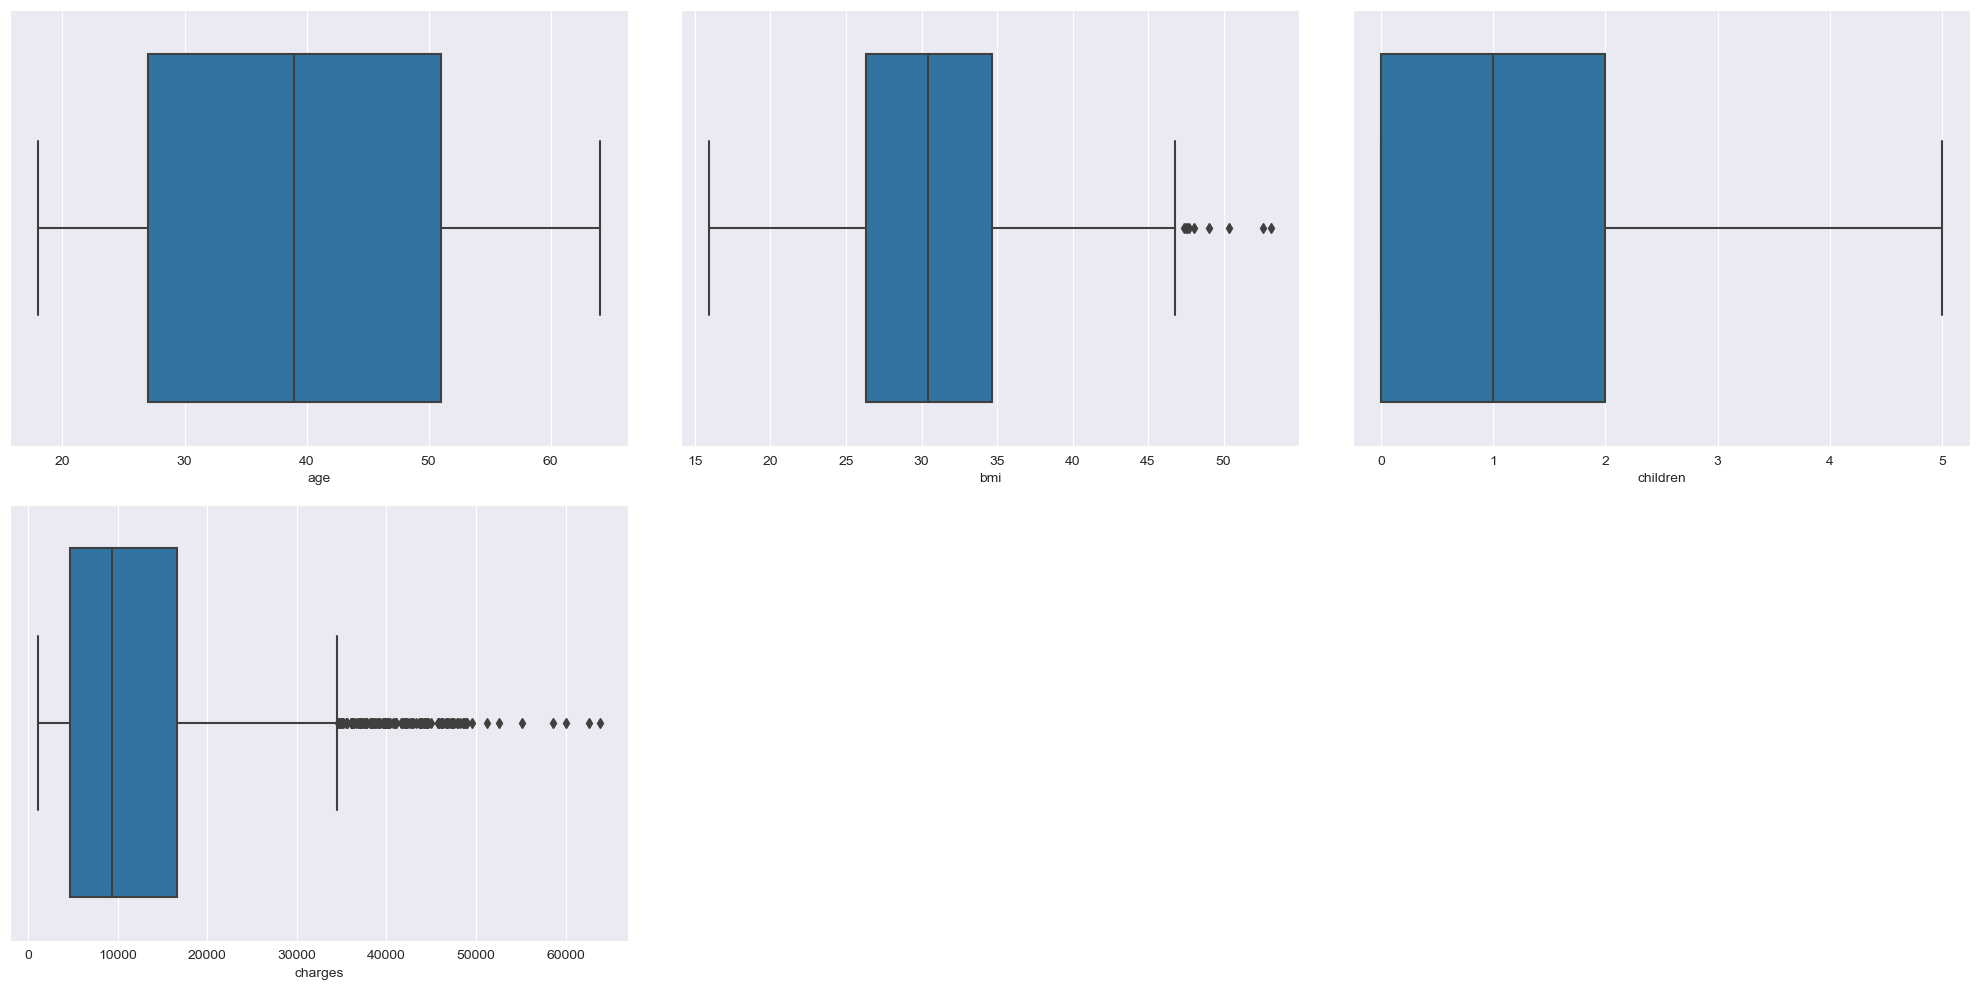

In [16]:
def plot_numerical_variables_boxplot(df):
    # list of numerical variables to plot
    num_vars = df.select_dtypes(include=[np.number])

    # create figure with subplots
    num_cols = len(num_vars.columns)
    num_rows = (num_cols + 2) // 3
    fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5*num_rows))
    axs = axs.flatten()

    # create violinplot for each numerical variable
    for i, var in enumerate(num_vars):
        sns.boxplot(x=var, data=df, ax=axs[i])

    # adjust spacing between subplots
    fig.tight_layout()

    # remove any extra subplots
    if num_cols < len(axs):
        for i in range(num_cols, len(axs)):
            fig.delaxes(axs[i])

    plt.show();

    # Chamada da função
plot_numerical_variables_boxplot(df_seguro)

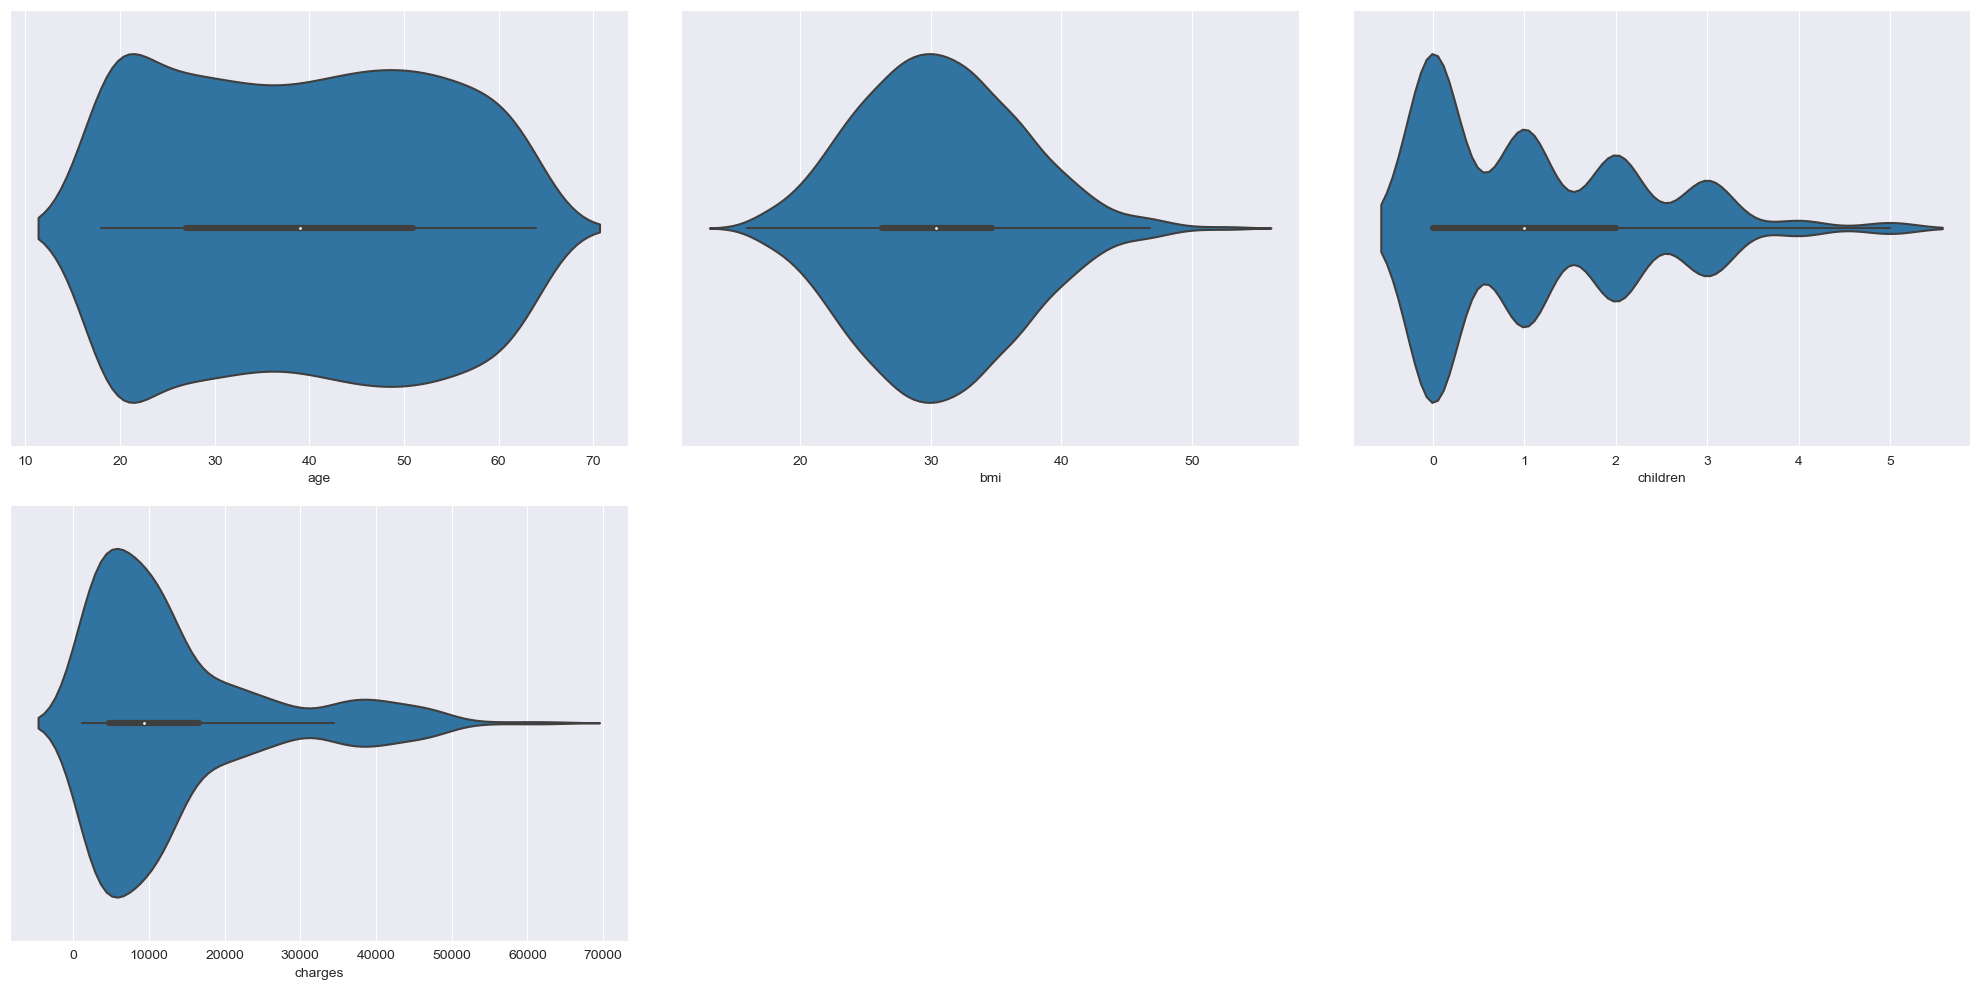

In [17]:
def plot_numerical_variables_violin(df):
    # list of numerical variables to plot
    num_vars = df.select_dtypes(include=[np.number])

    # create figure with subplots
    num_cols = len(num_vars.columns)
    num_rows = (num_cols + 2) // 3
    fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5*num_rows))
    axs = axs.flatten()

    # create violinplot for each numerical variable
    for i, var in enumerate(num_vars):
        sns.violinplot(x=var, data=df, ax=axs[i])

    # adjust spacing between subplots
    fig.tight_layout()

    # remove any extra subplots
    if num_cols < len(axs):
        for i in range(num_cols, len(axs)):
            fig.delaxes(axs[i])

    plt.show();

    # Chamada da função
plot_numerical_variables_violin(df_seguro)

<a id="3"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">3° |Pré-Processamento de Dados</div>

<a id="3.1"></a>
<h4 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>3.1 | Eliminando valores </b> duplicados 

In [18]:
df_seguro.drop_duplicates(inplace=True)

> <span style='font-size:15px; font-family:Verdana;color: #254E58; border-bottom: solid 3px'><b>3.1.1 | 
Verificando se temos valores duplicados</b></span>

In [19]:
df_seguro.duplicated().sum()

0

<a id="3.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>3.2 | Análise de </b> Correlação

- Quando utilizamos modelos $lineares$, é importante saber se as variáveis preditoras guardam alguma colinearidade. Caso ocorra, devemos remover uma das variáveis para que o modelo não seja afetado.

In [20]:
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [21]:
corr = df_seguro.corr()
plt.figure(figsize = (10, 5))
plt.title('Correlação entre as features')
sns.heatmap(corr,
            cmap = 'Blues',
            annot = True,
            vmin=-1,
            vmax=1,
            linewidths=2
           );

ValueError: could not convert string to float: 'female'

<a id="3.3"></a>
<h4 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>3.3 | Tratando Variáveis </b>Categóricas

- Lembrando que os modelos de machine learning não sabem o que são categorias em sua maioria, devemos, portanto, codificar as variáveis de $sexo$, $fumante$ e $localização$.

In [22]:
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [23]:
# Como somente temos variáveis nominais, vamos utilizar One Hot Encoder
# Podemos utilizar o get_dummies do pandas, ou o OneHotEncoder do scikit learn
# Para variáveis somente com duas classes (sex e smoker), podemos fazer um mapeamento direto

df_seguro['female'] = df_seguro['sex'].map({'female': 1, 'male': 0})
df_seguro['smoker'] = df_seguro['smoker'].map({'yes': 1, 'no': 0})
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges,female
0,19,female,27.90,0,1,southwest,16884.92,1
1,18,male,33.77,1,0,southeast,1725.55,0
2,28,male,33.00,3,0,southeast,4449.46,0
3,33,male,22.70,0,0,northwest,21984.47,0
4,32,male,28.88,0,0,northwest,3866.86,0


In [24]:
df_seguro = df_seguro.drop('sex', axis=1)
df_seguro.head()

,age,bmi,children,smoker,region,charges,female
0,19,27.90,0,1,southwest,16884.92,1
1,18,33.77,1,0,southeast,1725.55,0
2,28,33.00,3,0,southeast,4449.46,0
3,33,22.70,0,0,northwest,21984.47,0
4,32,28.88,0,0,northwest,3866.86,0


> <span style='font-size:15px; font-family:Verdana;color: #254E58; border-bottom: solid 3px'><b>3.3.1 | 
Codificando a variável $Região$ usando o $OneHotEncoder$</b></span>

In [25]:
df_seguro['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [26]:
# Para as regiões vamos usar OHE
colunas_regiao = pd.get_dummies(df_seguro['region'], drop_first=True)
colunas_regiao.head()

,northwest,southeast,southwest
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False


<a id="3.4"></a>
<h4 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>3.4 | Juntando as </b>Bases

In [27]:
# concat, concatena pandas dataframes, axis=1 ele junta colunas, axis=0 junta linhas
pd.concat([df_seguro, colunas_regiao], axis=1).head()

,age,bmi,children,smoker,region,charges,female,northwest,southeast,southwest
0,19,27.90,0,1,southwest,16884.92,1,False,False,True
1,18,33.77,1,0,southeast,1725.55,0,False,True,False
2,28,33.00,3,0,southeast,4449.46,0,False,True,False
3,33,22.70,0,0,northwest,21984.47,0,True,False,False
4,32,28.88,0,0,northwest,3866.86,0,True,False,False


In [28]:
df_seguro = pd.concat([df_seguro, colunas_regiao], axis=1)
df_seguro = df_seguro.drop('region', axis=1)
df_seguro.head()

,age,bmi,children,smoker,charges,female,northwest,southeast,southwest
0,19,27.90,0,1,16884.92,1,False,False,True
1,18,33.77,1,0,1725.55,0,False,True,False
2,28,33.00,3,0,4449.46,0,False,True,False
3,33,22.70,0,0,21984.47,0,True,False,False
4,32,28.88,0,0,3866.86,0,True,False,False


<a id="3.5"></a>
<h4 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>3.5 | Separando as Variáveis em </b>$X$ e $y$

- Vamos separar e determinando quem são variáveis $preditoras$ e variável $target$ </a>

In [29]:
# Verificando as Colunas
df_seguro.columns

Index(['age', 'bmi', 'children', 'smoker', 'charges', 'female', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [30]:
X = df_seguro.drop('charges', axis=1) # tirando a variável dependente
y = df_seguro[['charges']] # extraindo a variável dependente

In [31]:
# Variáveis preditoras (ou independentes ou, features)
X.head()

,age,bmi,children,smoker,female,northwest,southeast,southwest
0,19,27.90,0,1,1,False,False,True
1,18,33.77,1,0,0,False,True,False
2,28,33.00,3,0,0,False,True,False
3,33,22.70,0,0,0,True,False,False
4,32,28.88,0,0,0,True,False,False


In [32]:
# Variável dependente, ou target, ou label (ah, vcs entenderam :)
y.head()

,charges
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


<a id="3.6"></a>
<h4 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>3.6 | Separando os Dados em </b>$Treino$ e $Teste$

- Vamos separar logo essas bases?? Isso evita data $leakage$ porque vamos fazer *feature scaling* ou $Normalização$, por exemplo, e tais transformações deve ser realizadas **DEPOIS** do *split* $(separação)$.

In [33]:
# A função que separa nossa base em treino e teste! 
# Lembrando que faremos cross validation com a base de treino
from sklearn.model_selection import train_test_split

In [34]:
# Devolve uma tupla com 4 elementos: X de treino, X de teste, y de treino, y de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, # preditoras 
                                                        y, # target ou variável alvo
                                                        test_size=.2, 
                                                        random_state=42)

# Vamos ver quantas linhas ficamos com treino e teste
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((1069, 8), (268, 8), (1069, 1), (268, 1))

- **Verificando as informações da divisão da base**

In [35]:
1070+268
1070/1338

0.7997010463378177

<a id="3.7"></a>
<h4 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>3.7 | Normalizando os </b>dados

- <a> Feature Scaling </a>

  - Como usaremos pelo menos um modelo $linear$, é importante realizar scaling das features para mantê-las numa mesma escala de grandeza. 

  - Vamos usar o $MinMaxScaler$

In [36]:
df_seguro.describe()

,age,bmi,children,smoker,charges,female
count,1337.00,1337.00,1337.00,1337.00,1337.00,1337.00
mean,39.22,30.66,1.10,0.20,13279.12,0.50
std,14.04,6.10,1.21,0.40,12110.36,0.50
min,18.00,15.96,0.00,0.00,1121.87,0.00
25%,27.00,26.29,0.00,0.00,4746.34,0.00
50%,39.00,30.40,1.00,0.00,9386.16,0.00
75%,51.00,34.70,2.00,0.00,16657.72,1.00
max,64.00,53.13,5.00,1.00,63770.43,1.00


In [37]:
# Normalização - MinMaxScaler, Padronização - StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Criar scaler
scaler = MinMaxScaler()

In [38]:
type(scaler)

sklearn.preprocessing._data.MinMaxScaler

In [39]:
scaler

MinMaxScaler()

In [40]:
colunas = X_treino.columns

# Parte importante!! Fit no treino! Transform no treino e teste
X_treino[colunas] = scaler.fit_transform(X_treino)
X_teste[colunas] = scaler.transform(X_teste)

X_treino.shape, X_teste.shape

((1069, 8), (268, 8))

In [41]:
X_treino.head()

,age,bmi,children,smoker,female,northwest,southeast,southwest
1114,0.11,0.23,0.00,0.00,0.00,0.00,0.00,0.00
968,0.07,0.26,0.40,0.00,0.00,0.00,0.00,0.00
599,0.74,0.58,0.40,0.00,1.00,1.00,0.00,0.00
170,0.98,0.69,0.00,0.00,0.00,0.00,1.00,0.00
275,0.63,0.29,0.40,0.00,1.00,0.00,0.00,0.00


In [42]:
X_treino.describe()

,age,bmi,children,smoker,female,northwest,southeast,southwest
count,1069.00,1069.00,1069.00,1069.00,1069.00,1069.00,1069.00,1069.00
mean,0.46,0.39,0.22,0.20,0.49,0.25,0.27,0.25
std,0.30,0.16,0.24,0.40,0.50,0.43,0.44,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.20,0.27,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.46,0.38,0.20,0.00,0.00,0.00,0.00,0.00
75%,0.72,0.50,0.40,0.00,1.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [43]:
X_teste.describe()

,age,bmi,children,smoker,female,northwest,southeast,southwest
count,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00
mean,0.46,0.41,0.23,0.22,0.53,0.22,0.29,0.22
std,0.31,0.17,0.25,0.42,0.50,0.42,0.45,0.42
min,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.17,0.29,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.48,0.41,0.20,0.00,1.00,0.00,0.00,0.00
75%,0.72,0.52,0.40,0.00,1.00,0.00,1.00,0.00
max,1.00,0.86,1.00,1.00,1.00,1.00,1.00,1.00


<a id="4"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">4° |Criando o Modelo Preditivo</div>

# <font color = 'Darkorange'> **Selecionando o melhor**</font><font color = 'Snad'> **Modelo**</font>

- Primeiro modelo que vamos treinar é a regressão linear. Lembrando que vamos utilizar cross validation para evitar overfit e ter uma base de comparação para outros modelos

<a id="4.1"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>4.1 | Modelo de </b> Regressão Linear

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [45]:
# Criando o estimador, algorimo, modelo, preditor, regressor (virge, que tanto de nome!)
regressao_linear = LinearRegression()

# Vamos treinar utilizando cross validation
valores_rmse_rl = cross_val_score(estimator=regressao_linear, 
                                  X=X_treino, 
                                  y=y_treino, 
                                  cv=10, # 10-fold CV
                                  scoring='neg_root_mean_squared_error')
valores_rmse_rl

array([-6799.74661722, -6785.31693791, -5030.32998484, -6320.71510906,
       -5899.91832207, -5715.53393822, -6734.49006846, -5517.2180933 ,
       -6271.5384396 , -5994.12894053])

In [46]:
len(valores_rmse_rl)

10

> <span style='font-size:15px; font-family:Verdana;color: #254E58; border-bottom: solid 3px'><b>4.1.1 | Transformando os valores em Positivo</b></span>

In [47]:
valores_rmse_rl = valores_rmse_rl * -1
valores_rmse_rl

array([6799.74661722, 6785.31693791, 5030.32998484, 6320.71510906,
       5899.91832207, 5715.53393822, 6734.49006846, 5517.2180933 ,
       6271.5384396 , 5994.12894053])

> <span style='font-size:15px; font-family:Verdana;color: #254E58; border-bottom: solid 3px'><b>4.1.2 | Verificando o erro médio</b></span>

In [48]:
media_rmse_rl = valores_rmse_rl.mean()
media_rmse_rl

6106.893645122995

<a id="4.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>4.2 | Modelo de Arvor </b> de Regressão

In [49]:
from sklearn.tree import DecisionTreeRegressor

arvore_regressao = DecisionTreeRegressor()

# Vamos treinar utilizando cross validation (sempre!!)
valores_rmse_arvore = cross_val_score(estimator=arvore_regressao, 
                                      X=X_treino, 
                                      y=y_treino, 
                                      cv=10, # 
                                  scoring='neg_root_mean_squared_error')
valores_rmse_arvore

array([-6688.41206275, -7306.35211373, -6192.15291966, -7771.75196566,
       -8383.51960199, -5326.53980448, -7292.22054906, -7103.96819856,
       -8221.56139264, -6640.14985807])

In [50]:
valores_rmse_arvore = valores_rmse_arvore * -1
valores_rmse_arvore

array([6688.41206275, 7306.35211373, 6192.15291966, 7771.75196566,
       8383.51960199, 5326.53980448, 7292.22054906, 7103.96819856,
       8221.56139264, 6640.14985807])

In [51]:
media_rmse_arvore = valores_rmse_arvore.mean()
media_rmse_arvore

7092.6628466606735

<a id="4.3"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>4.3 | Vamos retirar as colunas de região </b>

- Visto que essa variáveis não mostraram muita influência na variável target quando olhamos a correlação

In [52]:
X_treino.columns

Index(['age', 'bmi', 'children', 'smoker', 'female', 'northwest', 'southeast',
       'southwest'],
      dtype='object')

In [53]:
# Vamos treinar utilizando cross validation (sempre!!)
colunas_regiao = ['northwest', 'southeast', 'southwest']
valores_rmse_rl_sem_regiao = cross_val_score(estimator=regressao_linear, 
                                             X=X_treino.drop(colunas_regiao, axis=1), 
                                             y=y_treino, 
                                             cv=10, 
                                      scoring='neg_root_mean_squared_error')
valores_rmse_rl_sem_regiao.mean() * -1

6102.261734686557

In [54]:
valores_rmse_rl_sem_regiao = valores_rmse_rl_sem_regiao * -1

In [55]:
# Vamos treinar utilizando cross validation (sempre!!)
colunas_regiao = ['northwest', 'southeast', 'southwest']
valores_rmse_arvore_sem_regiao = cross_val_score(estimator=arvore_regressao, 
                                                 X=X_treino.drop(colunas_regiao, axis=1), 
                                                 y=y_treino, cv=10, 
                                      scoring='neg_root_mean_squared_error')
valores_rmse_arvore_sem_regiao.mean() * -1

6647.908721101305

In [56]:
valores_rmse_arvore_sem_regiao = valores_rmse_arvore_sem_regiao * -1

> <span style='font-size:15px; font-family:Verdana;color: #254E58; border-bottom: solid 3px'><b>4.3.1 | Comparando os erros dos dois modelos escolhidos</b></span>

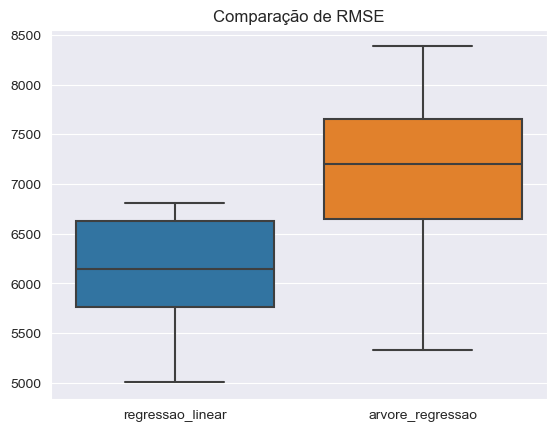

In [57]:
rmse = pd.DataFrame({'regressao_linear': valores_rmse_rl_sem_regiao, 'arvore_regressao': valores_rmse_arvore})

sns.boxplot(data=rmse).set_title("Comparação de RMSE");

## <a> Modelo Campeão! </a>

- O modelo Campeão pela métrica escolhida foi o de $Regressão$ $Linear$

   - Agora que temos um modelo campeao, vamos treinar modelo na base de treinamento toda!


<a id="5"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden">5° |Treinando o Modelo</div>

<a id="5.1"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>5.1 | Treinando o Modelo </b>

In [58]:
regressao_linear.fit(X_treino.drop(colunas_regiao, axis=1), y_treino)

LinearRegression()

In [59]:
regressao_linear.coef_

array([[11458.38000614, 11359.0217263 ,  2689.816833  , 23051.36812442,
           85.02704092]])

In [60]:
df_coeficientes = pd.DataFrame(regressao_linear.coef_)
df_coeficientes.columns=regressao_linear.feature_names_in_
df_coeficientes

,age,bmi,children,smoker,female
0,11458.38,11359.02,2689.82,23051.37,85.03


In [61]:
#!pip install statsmodels

> <span style='font-size:15px; font-family:Verdana;color: #254E58; border-bottom: solid 3px'><b>5.1 | Verificando se o modelo tem o  𝑃−𝑣𝑎𝑙𝑜𝑟 valido estatísticamente </b></span>

In [62]:
# Extra: podemos calcular o p-valor dos coeficientes de cada regressão utilizando o pacote statsmodels
import statsmodels.api as sm

rl_statsmodels = sm.OLS(y_treino,X_treino.drop(colunas_regiao, axis=1))
resultado_fit = rl_statsmodels.fit()
p_valores = resultado_fit.summary2().tables[1]['P>|t|']
p_valores

age        0.00
bmi        0.00
children   0.01
smoker     0.00
female     0.37
Name: P>|t|, dtype: float64

**Conclusão**: Ou seja, os coeficientes para crianças e sexo não são estatisticamente válidos, devemos ter cautela ao analisar o impacto nos valores do plano de saúde. Mas idade, índice de massa corporal e se a pessoa fuma ou não, tá liberado! Se a estatística falou, tá falado :)

## <a> Finalmente </a>

Agora que temos nosso modelo final, podemos fazer inferências dos valores do plano de saúde no teste. Percebam que nunca utilizamos o teste PARA NADA, como deve ser.

> <span style='font-size:15px; font-family:Verdana;color: #254E58; border-bottom: solid 3px'><b>5.1.1 | Eliminando as colunas Região do $Teste$ </b></span>

In [63]:
# ver estimadores scikit learn
# estimador é treinado com fit
# estimador prediz com predict
precos_preditos = regressao_linear.predict(X_teste.drop(colunas_regiao, axis=1))
precos_preditos[:5]

array([[ 7780.09204548],
       [ 5977.83338997],
       [14215.82300956],
       [31590.59473466],
       [ 9223.64922442]])

In [64]:
len(precos_preditos)

268

In [65]:
y_teste.head()

,charges
900,8688.86
1064,5708.87
1256,11436.74
298,38746.36
237,4463.21


<a id="5.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #254E58; background-color: #ffffff;"><b>5.2 | Criando um DataFrame </b>

> <span style='font-size:15px; font-family:Verdana;color: #254E58; border-bottom: solid 3px'><b>5.2.1 | Análisando o Valor Predito, valor Real e a Diferença Absoluta </b></span>

In [66]:
predicoes_vs_real = pd.DataFrame({'predicao': precos_preditos.flatten(), 'real': y_teste.values.flatten()})
predicoes_vs_real['diferenca_abs'] = abs(predicoes_vs_real['predicao'] - predicoes_vs_real['real'])
predicoes_vs_real.head(20)

,predicao,real,diferenca_abs
0,7780.09,8688.86,908.77
1,5977.83,5708.87,268.97
2,14215.82,11436.74,2779.08
3,31590.59,38746.36,7155.76
4,9223.65,4463.21,4760.44
5,13438.44,9304.70,4133.74
6,29841.66,38511.63,8669.97
7,1685.04,2150.47,465.43
8,10919.47,7345.73,3573.74
9,11281.04,10264.44,1016.60


> <span style='font-size:15px; font-family:Verdana;color: #254E58; border-bottom: solid 3px'><b>5.2.2 | Verificando o  $𝑅^2$ </b></span>

In [67]:
# Tudo muito bem, tudo muito bom. Mas será que uma simples média é melhor do 
# que nosso modelo? Vamos testar o r quadrado
from sklearn.metrics import r2_score

r2_score(y_true=y_teste, y_pred=precos_preditos)

0.8046218811772661

**Conclusão**: Até que $0,78$ não é ruim, nosso modelo explica bastante a variável target

## Quer testar uma predição com inputs?

In [68]:
X_teste.drop(colunas_regiao, axis=1).columns

Index(['age', 'bmi', 'children', 'smoker', 'female'], dtype='object')

In [69]:
idade = input()

24


In [70]:
indice_massa_corporal = input()

29


In [71]:
criancas = input()

1


In [72]:
fumante = input("1 para fumante, 0 para não fumante: ")

1 para fumante, 0 para não fumante: 0


In [73]:
sexo = input("1 para mulher, 0 para homem: ")

1 para mulher, 0 para homem: 0


In [74]:
idade, indice_massa_corporal, criancas, fumante, sexo

('24', '29', '1', '0', '0')

In [75]:
# Realizando scaling das features
#scaler_sem_regiao = MinMaxScaler()
#scaler_sem_regiao.fit(X_treino.drop(colunas_regiao, axis=1))

# Completamos com 1,1,1 porque o X_treino original tinha colunas de região
features = [[idade, indice_massa_corporal, criancas, fumante, sexo, 1, 1, 1]]

# O scaler é lááááá do treino (nada de fitar de novo)
features = scaler.transform(features)
features

array([[0.13043478, 0.35082055, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 1.        ]])

In [76]:
features

array([[0.13043478, 0.35082055, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 1.        ]])

In [77]:
# Pegando somente as 5 features
features = features[:,:-3]
features

array([[0.13043478, 0.35082055, 0.2       , 0.        , 0.        ]])

In [78]:
# Resultado da predição!
regressao_linear.predict(features)

array([[4072.46824529]])